In [1]:
import pickle
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Bio import SeqIO
from Bio import AlignIO
import subprocess



In [3]:
with open('results/final_models/GT1s_PtUGT1/pickles/keys_list.pkl', "rb") as input_file:
   keys_list = pickle.load(input_file)

FileNotFoundError: [Errno 2] No such file or directory: 'results/final_models/GT1s_PtUGT1/pickles/keys_list.pkl'

In [20]:
fasta_sequences = SeqIO.parse('datasets/EnzymeMiner Results/identified_targets.fas','fasta')
with open('datasets/GT1_PtUGT1_msa_sequences.faa','w') as out_file:
    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        if name in keys_list:
            out_file.write('>' + name + '\n' + sequence + '\n')

In [6]:
# Define a function to create the FASTA file
def create_fasta_from_excel(excel_file, output_fasta_file):
    # Read the Excel file
    df = pd.read_excel(excel_file)

    # Open the output FASTA file
    with open(output_fasta_file, 'w') as fasta_file:
        # Iterate through each row in the DataFrame
        for index, row in df.iterrows():
            # Get the protein name and sequence
            protein_name = row['UGT_name']
            sequence = row['Amino_Acid_Sequence']

            # Write to the FASTA file in the correct format
            fasta_file.write(f">{protein_name}\n")
            fasta_file.write(f"{sequence}\n")

# Example usage:
create_fasta_from_excel('UGT_names_excel.xlsx', 'vae_notebooks/datasets/KnownGT1.faa')

In [9]:
PFAM_msa = AlignIO.read('vae_notebooks/datasets/PF00201.alignment.full', 'stockholm')

In [11]:
print(PFAM_msa)

SingleLetterAlphabet() alignment with 58310 rows and 4650 columns
--------------------------------------------...--- A0A182GYX7_AEDAL/7-456
--------------------------------------------...--- A0A7L3M6F8_9PASS/12-223
--------------------------------------------...--- A0A8C3SHR1_CHESE/28-524
--------------------------------------------...--- A0A059AT90_EUCGR/264-439
--------------------------------------------...--- A0A7J0DQ57_9ERIC/261-405
--------------------------------------------...--- A0A0P7X815_SCLFO/311-574
--------------------------------------------...--- A0A2P5E7Q7_TREOI/247-450
--------------------------------------------...--- A0A087HQD0_ARAAL/14-448
--------------------------------------------...--- A0A1J6I813_NICAT/80-427
--------------------------------------------...--- A0A0J8B842_BETVV/267-414
--------------------------------------------...--- A0A6P6V9M3_COFAR/259-456
--------------------------------------------...--- A0A0E0I2E2_ORYNI/229-423
----------------------------

In [22]:
for protein in PFAM_msa:
    if protein.id in ["U71B1_ARATH/231-422","B6SRY5_MAIZE/245-452","Q5IFH7_MEDTR/244-441"]:
        print(protein.id)
        print(protein.seq)
        print('\n')

Q5IFH7_MEDTR/244-441
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------vgplldlkgqpnpkldqaqhdlilkwld--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
def fix_seqs(input_string):
    seq_ = input_string.replace('.', '')
    seq_ = ''.join([char for char in seq_ if not char.islower()])
    return seq_

def hmmbuilding(input_msa, input_fasta, hmm_name, output_name,hmmer_path='/Users/dahala/Projects/HMMER/bin'):
    if not os.path.exists(f'/Users/dahala/GitHub/VAE-enzymes/hmm_model/{hmm_name}.hmm'):
        print('Building HMM model...')
        subprocess.run(f'{hmmer_path}/hmmbuild --amino /Users/dahala/GitHub/VAE-enzymes/hmm_model/{hmm_name}.hmm {input_msa} > /Users/dahala/GitHub/VAE-enzymes/hmm_model/{hmm_name}_hmmbuild.log', shell=True, executable="/bin/zsh")
    subprocess.run(f'cat {input_fasta} | {hmmer_path}/hmmalign --trim --outformat afa /Users/dahala/GitHub/VAE-enzymes/hmm_model/{hmm_name}.hmm - > /Users/dahala/GitHub/VAE-enzymes/vae_notebooks/datasets/{output_name}.afa', shell=True, executable="/bin/zsh")
    hmm_msa = AlignIO.read(f'/Users/dahala/GitHub/VAE-enzymes/vae_notebooks/datasets/{output_name}.afa', 'fasta')
    with open(f'/Users/dahala/GitHub/VAE-enzymes/vae_notebooks/datasets/{output_name}_fix.afa','w') as out_file:
        for prot in hmm_msa:
            out_file.write('>' + prot.id + '\n')
            out_file.write(fix_seqs(str(prot.seq)))
            out_file.write('\n')

In [24]:
hmmbuilding('/Users/dahala/GitHub/VAE-enzymes/datasets/GT1s_PtUGT1.fa', '/Users/dahala/GitHub/VAE-enzymes/datasets/GT1s_PtUGT1_raw.fas','EnzymeMiner_PtUGT1','EnzymeMiner_PtUGT1')

In [50]:
import subprocess
subprocess.run("source ~/.zshrc", shell=True, executable="/bin/zsh")
hmmer_path = '/Users/dahala/Projects/HMMER/bin' #the path to the hmmer bin folder
out_path = '/Users/dahala/GitHub/VAE-enzymes' #the path to the output folder
ORIGINAL='vae_notebooks/datasets/PF00201.fasta'
NEW='vae_notebooks/datasets/KnownGT1.faa'
subprocess.run(f'{hmmer_path}/hmmbuild --amino {out_path}/model.hmm vae_notebooks/datasets/PF00201.alignment.full > {out_path}/hmmbuild.log', shell=True, executable="/bin/zsh") # had to create a new folder for hmm model
subprocess.run(f'cat {ORIGINAL} | {hmmer_path}/hmmalign --trim --outformat afa {out_path}/model.hmm - > {out_path}/PFAM_KnownGT.afa', shell=True, executable="/bin/zsh") #not sure if the hmm folder the correct place to store the hmmalign output
#for name in ['UGT71B1', 'Zm_UGT72G3','Mt_UGT71G1']:
#    subprocess.run(f'{hmmer_path}/hmmalign --trim --outformat afa {out_path}model.hmm vae_notebooks/datasets/{name}.fasta > {out_path}/{name}.afa', shell=True, executable="/bin/zsh") #not sure if the hmm folder the correct place to store the hmmalign output


CompletedProcess(args='cat vae_notebooks/datasets/PF00201.fasta | /Users/dahala/Projects/HMMER/bin/hmmalign --trim --outformat afa /Users/dahala/GitHub/VAE-enzymes//model.hmm - > /Users/dahala/GitHub/VAE-enzymes//PFAM_KnownGT.afa', returncode=0)

In [29]:
for protein_pfam,protein_aligned in zip(PFAM_msa, Aligned_msa):
    print(protein_pfam.id,protein_aligned.id)

A0A182GYX7_AEDAL/7-456 Zm_UGT72G3
A0A7L3M6F8_9PASS/12-223 Zm_UGT72G4
A0A8C3SHR1_CHESE/28-524 Zm_UGT71B1
A0A059AT90_EUCGR/264-439 Zm_63550
A0A7J0DQ57_9ERIC/261-405 Zm_UGT708A6
A0A0P7X815_SCLFO/311-574 Zm_60993
A0A2P5E7Q7_TREOI/247-450 Zm_58314
A0A087HQD0_ARAAL/14-448 Zm_56026
A0A1J6I813_NICAT/80-427 Zm_UGT88C10
A0A0J8B842_BETVV/267-414 Zm_UGT706F8
A0A6P6V9M3_COFAR/259-456 Zm_15991
A0A0E0I2E2_ORYNI/229-423 Zm_11344
A0A8K0N551_COCNU/247-410 UGT88A12
A0A2G9HXB4_9LAMI/200-435 UGT88B1
A0A3P6REG7_9BILA/1-226 UGT71E1
A0A4U6UT27_SETVI/24-443 Sl_UGT72B68
A0A8J6BZE2_ZIZPA/244-432 RhUGT1
A0A6A2ZDM0_HIBSY/214-424 UGT88D7
A0A059AEW0_EUCGR/226-429 Os_88C1
W1P188_AMBTC/236-437 UGT72J1
A0A0K0E429_STRER/21-524 Os_72H3
A0A0H5CGG9_9PSEU/213-363 UGT72F1
A0A5A7RD48_STRAF/35-173 UGT71A6
A0A6J2WU15_CHACN/24-219 Mt_88E1
A0A087GSC4_ARAAL/179-277 UGT72L1
A0A8T0U930_PANVG/260-393 UGT88G1
A0A0D3DE81_BRAOL/256-419 UGT72Q1
W9RX41_9ROSA/287-442 UGT72M2
A0A3Q7IQZ7_SOLLC/626-833 UGT71Q2
A0A672QRW0_SINGR/52-213 UGT71P1


In [69]:
# Load your fasta file and extract accession IDs
fasta_file = "vae_notebooks/datasets/PF00201.fasta"
acc_ids = []

for record in SeqIO.parse(fasta_file, "fasta"):
    acc_id = record.id.split("|")[0]
    acc_ids.append(acc_id)

# Save ACC_IDs to a file for batch retrieval
with open("PF00201_acc_ids.txt", "w") as f:
    for acc_id in acc_ids:
        f.write(f"{acc_id}\n")

In [91]:
# Store lineage information
lineage_data = {}

for acc_id in tqdm(acc_ids_sample, desc="Fetching lineage data", unit="protein"):
    lineage = fetch_lineage(acc_id)
    if lineage:
        lineage_data[acc_id] = lineage
    time.sleep(1)  # Add a 1-second delay between requests

# Save the results to a file
with open("PF00201_lineage_data_sample.tsv", "w") as f:
    for acc_id, lineage in lineage_data.items():
        f.write(f"{acc_id}\t{lineage}\n")

Fetching lineage data: 100%|██████████| 10/10 [00:28<00:00,  2.81s/protein]


In [3]:
PFAM_UniProt = pd.read_csv('random_data/categorized_taxonomic_lineage_data.csv',index_col=0)

/var/folders/4n/74gpb5hj01g0m2nkznhtyjrr0000gp/T/ipykernel_2986/1628705.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  PFAM_UniProt = pd.read_csv('random_data/categorized_taxonomic_lineage_data.csv',index_col=0)


In [4]:
PFAM_UniProt_GT = PFAM_UniProt[PFAM_UniProt['EC number'].str.contains('2.4.')&~pd.isnull(PFAM_UniProt['EC number'])]
PFAM_UniProt_GT_filter = PFAM_UniProt_GT[['Entry', 'Organism','Gene Ontology (GO)', 'EC number', 'Protein families', 'Reviewed','superkingdom', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'subspecies']]

In [6]:
PFAM_UniProt_GT.columns

Index(['Entry', 'Protein names', 'Organism', 'Taxonomic lineage',
       'Gene Ontology (GO)', 'EC number', 'pH dependence',
       'Temperature dependence', 'Protein families', 'Reviewed', 'subspecies',
       'in: green algae', 'no rank', 'section', 'in: a-proteobacteria',
       'in: high G+C Gram-positive bacteria', 'suborder', 'kingdom',
       'Aveneae type', 'infraclass', 'subfamily', 'in: cyanobacteria', 'genus',
       'subphylum', 'phylum', 'clade', 'serogroup', 'subkingdom', 'subsection',
       'subcohort', 'Poeae type', 'subclass', 'class', 'varietas', 'strain',
       'cohort', 'subtribe', 'strain race 4', 'superkingdom', 'species',
       'tribe', 'MAC', 'family', 'superorder', 'superclass', 'infraorder',
       'subgenus', 'in: firmicutes', 'superfamily', 'parvorder',
       'in: eudicots', 'order', 'in: glomeromycetes', 'series'],
      dtype='object')

In [19]:
PFAM_UniProt_GT_filter.to_csv('PFAM_UniProt_GT_filter.csv')
PFAM_UniProt_GT_filter = pd.read_csv('PFAM_UniProt_GT_filter.csv', index_col=0)

In [27]:
PFAM_UniProt_GT_filter = pd.read_csv('PFAM_UniProt_GT_filter.csv',index_col=0)
msa_taxonomy = []
for protein in SeqIO.parse(f'vae_notebooks/results/pfam201_filtered_hmm/msa/training_msa.fasta', "fasta"):
    protein_name = protein.id
    prot_id = protein_name.split('|')[0]
    if prot_id in PFAM_UniProt_GT_filter.index:
        msa_taxonomy.append([protein_name,PFAM_UniProt_GT_filter.loc[prot_id].superkingdom,PFAM_UniProt_GT_filter.loc[prot_id].kingdom,PFAM_UniProt_GT_filter.loc[prot_id].phylum,PFAM_UniProt_GT_filter.loc[prot_id]['class'],PFAM_UniProt_GT_filter.loc[prot_id].order,PFAM_UniProt_GT_filter.loc[prot_id].family,PFAM_UniProt_GT_filter.loc[prot_id].genus])
msa_taxonomy = pd.DataFrame(msa_taxonomy,columns=['UniProt','superkingdom','kingdom','phylum','class','order','family','genus'])
msa_taxonomy = msa_taxonomy.set_index('UniProt')

In [38]:
with open('vae_notebooks/datasets/At71B1_ancestral_sequences.fasta','w') as f:
    for i in range(151,300):
        seq = np.loadtxt(f'FireProtASR_results/ancestrals/node_{i}.fas',dtype=str)
        seq = str(seq)
        f.write(f'>anc_{i}\n{seq}\n')
    

In [3]:
EnzymeMiner_PtUGT1_sequences = SeqIO.parse('random_data/EnzymeMiner_PtUGT1.faa','fasta')
with open('random_data/EnzymeMiner_PtUGT1_fix.faa','w') as out_file:
    for fasta in EnzymeMiner_PtUGT1_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        if "J" in sequence:
            sequence = sequence.replace('J','L')
        out_file.write('>' + name + '\n' + sequence + '\n')

In [ ]:
GT1_wCazy_sequences = SeqIO.parse('random_data/GT1_wCazy.faa','fasta')
with open('random_data/GT1_wCazy_fix.faa','w') as out_file:
    for fasta in GT1_wCazy_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        if "J" in sequence:
            sequence = sequence.replace('J','L')
        out_file.write('>' + name + '\n' + sequence + '\n')

In [14]:
GT1_wCazy_fix_sequences = SeqIO.parse('random_data/GT1_wCazy_fix.faa','fasta')
for fasta in GT1_wCazy_fix_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        if "J" in sequence:
            print(name,sequence)

In [141]:
fasta_sequences = SeqIO.parse('PF00201.fasta','fasta')
with open('PF00201_filtered.fasta','w') as out_file:
    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        id = name.split('|')[0]
        if id in PFAM_UniProt_GT_filter.index:
            out_file.write('>' + name + '\n' + sequence + '\n')

In [142]:
import subprocess
subprocess.run("source ~/.zshrc", shell=True, executable="/bin/zsh")
hmmer_path = '/Users/dahala/Projects/HMMER/bin' #the path to the hmmer bin folder
out_path = '/Users/dahala/GitHub/VAE-enzymes' #the path to the output folder
#ORIGINAL='vae_notebooks/datasets/PF00201.fasta'
NEW='/Users/dahala/GitHub/VAE-enzymes/PF00201_filtered.fasta'
subprocess.run(f'{hmmer_path}/hmmbuild --amino {out_path}/model.hmm vae_notebooks/datasets/PF00201.alignment.full > {out_path}/hmmbuild.log', shell=True, executable="/bin/zsh") # had to create a new folder for hmm model
subprocess.run(f'cat {NEW} | {hmmer_path}/hmmalign --trim --outformat afa {out_path}/model.hmm - > {out_path}/PFAM_filtered_hmm.afa', shell=True, executable="/bin/zsh") #not sure if the hmm folder the correct place to store the hmmalign output
#for name in ['UGT71B1', 'Zm_UGT72G3','Mt_UGT71G1']:
#    subprocess.run(f'{hmmer_path}/hmmalign --trim --outformat afa {out_path}model.hmm vae_notebooks/datasets/{name}.fasta > {out_path}/{name}.afa', shell=True, executable="/bin/zsh") #not sure if the hmm folder the correct place to store the hmmalign output


CompletedProcess(args='cat /Users/dahala/GitHub/VAE-enzymes/PF00201_filtered.fasta | /Users/dahala/Projects/HMMER/bin/hmmalign --trim --outformat afa /Users/dahala/GitHub/VAE-enzymes/model.hmm - > /Users/dahala/GitHub/VAE-enzymes/PFAM_filtered_hmm.afa', returncode=0)

In [7]:
PFAM_filtered_aligned = AlignIO.read('vae_notebooks/datasets/PFAM_filtered_hmm.afa', 'fasta')
with open('vae_notebooks/datasets/PFAM_filtered_hmmalign_fix.afa','w') as out_file:
    for pfam in PFAM_filtered_aligned:
        out_file.write('>' + pfam.id + '\n')
        out_file.write(fix_seqs(str(pfam.seq)))
        out_file.write('\n')

In [52]:
from Bio import Phylo
from io import StringIO
import pylab
treedata = "(A, (B, C), (D, E))"
handle = StringIO(treedata)
tree = Phylo.read(handle, "newick")
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(name='A')
        Clade()
            Clade(name='B')
            Clade(name='C')
        Clade()
            Clade(name='D')
            Clade(name='E')


Tree(rooted=False, weight=1.0)
    Clade(confidence=151)
        Clade(branch_length=0.126838, confidence=152)
            Clade(branch_length=0.099939, confidence=153)
                Clade(branch_length=0.061553, confidence=154)
                    Clade(branch_length=0.048953, confidence=155)
                        Clade(branch_length=0.402906, name='"XP_031252423.1"')
                        Clade(branch_length=0.403713, name='"XP_024037628.1"')
                    Clade(branch_length=0.022506, confidence=156)
                        Clade(branch_length=0.036195, confidence=157)
                            Clade(branch_length=0.036974, confidence=158)
                                Clade(branch_length=0.358214, name='"ALX36003.1"')
                                Clade(branch_length=0.332831, name='"KAB1205167.1"')
                            Clade(branch_length=0.027703, confidence=159)
                                Clade(branch_length=0.354349, name='"AYR16626.1"')
          

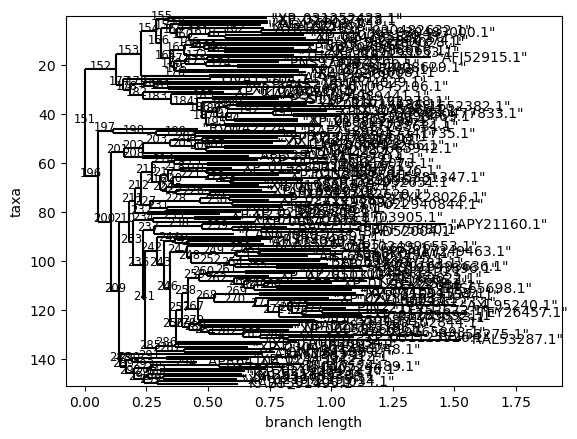

In [54]:
tree_str = str(np.loadtxt('FireProtASR_results/tree.tre',dtype=str))
handle = StringIO(tree_str)
tree = Phylo.read(handle, "newick")
print(tree)
Phylo.draw(tree)

### Combining GASP predictions

In [24]:
All_data_df = pd.read_csv('All_data.csv')
Dataset1 = All_data_df[All_data_df['ID']=='Dataset1']

In [31]:
for substrate in Dataset1.Acceptor.unique():
    print(substrate)
    print(Dataset1[(Dataset1['Acceptor']==substrate)&(Dataset1.Measurement_type=='Activity_score')].shape[0])

(-)-Epicatechin
6
(+/-)-Huperzine A
18
2,3,4-Trichlorophenol
6
2,3-Dimethylbenzoic acid
18
2,6-Dimethoxyphenol
24
3,4-Dichloroaniline
24
3,4-Dichlorothiophenol
18
Frambinone
6
5-Methyl-2-furanthiol
18
6-Benzylaminopurine
18
Abscisic acid
24
Andrographolide
24
Arctigenin
6
Artemisinic acid
6
Atropine
6
Bergaptol
6
Boldine
6
Capsaicin
6
Carnosic acid
6
Cinnamic acid
24
Cinnamyl alcohol
24
Coniferyl alcohol
24
Corylifol A
6
Cyanidin
24
Dehydrodiisoeugenol
6
Dopamine
6
Ellagic acid
6
Erianin
6
Ethylparaben
6
Eucamalol
6
Eugenol
6
Evodine
6
Ferulic acid
6
Forskolin
24
Genistein
24
Geraniol
24
Gingerol
24
Ginkgolide B
6
Gomisin J
6
Guaiol
6
Higenamine
6
Hinokiol
6
Homovanillic acid
24
Honokiol
6
Hotrienol
6
Huperzine A
6
Hydroxytyrosol Acetate
6
Ilicic acid
6
Indole-3-carboxylic acid
6
Ingenol mebutate
6
Isoborneol
6
Isosteviol
6
Levodopa
6
Linalool
24
l-Menthol
6
Lovastatin
5
L-Theanine
6
Luteolin
6
Madecassic acid
6
Menthol
18
Methyl Salicylate
6
Mollugin
6
Naringenin
6
Nerolidol
6
Noricar

In [18]:
GASP_DCA = pd.read_csv('vae_notebooks/GASP_predictions/pred_blosum62Amb_EnzymeMiner_PtUGT1_fix_7257.tsv',sep='\t',header=1)
GASP_DCP = pd.read_csv('vae_notebooks/GASP_predictions/pred_blosum62Amb_EnzymeMiner_PtUGT1_fix_79964.tsv',sep='\t',header=1)
GASP_DCA_DCP = pd.merge(GASP_DCA,GASP_DCP,on='enzyme',suffixes=('_DCA','_DCP'))[['enzyme','pred_DCA','pred_DCP']]

In [36]:
GASP_DCA_DCP.to_csv('vae_notebooks/GASP_predictions/GASP_DCA_DCP.tsv',sep='\t',index=False,header=True)